# CNN  Assignment

## 理论

### 复习上课内容以及复现课程代码

参考 `tensorflow_and_keras.ipynb`

### 回答以下理论题目?

####  Compared to FNN, what is the biggest advantage of CNN?

参数的数量大大减少

#### Suppose your input is a 100 by 100 gray image, and you use a convolutional layer with 50 filters that are each 5x5. How many parameters does this hidden layer have (including the bias parameters)? 

In [1]:
# number of params

5 * 5 * 50 + 50

1300

#### What are "local invariant" and "parameter sharing" ?

* local invariant, 卷积核特征提取时与位置无关
* parameter sharing, CNN中卷积核的参数用于所有的输入，而FCN中权重参数只能影响一个输入

####  Why we use batch normalization ?

正则化防止数据进入饱和区，解决了梯度消失的问题。

#### What problem does dropout try to solve ?

防止过拟合

####  Is the following statement correct and why ? "Because pooling layers do not have parameters, they do not affect  the backpropagation(derivatives) calculation"

错误，不同的pooling，反向传播误差的方式不一样。

## 实践

### Image Classification

**In the first session of the practical part, you will implement an image classification model using any deep learning libraries that you are familiar with,  which means, except for tensorflow and keras, you can also use pytorch/caffe/... .  The dataset used in this session is the cifar10 which contains 50000 color (RGB) images, each with size 32x32x3.  All 50000 images are classified into ten categories.**

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

/Users/hotbaby/Library/Python/3.7/lib/python/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/hotbaby/Library/Python/3.7/lib/python/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/hotbaby/Library/Python/3.7/lib/python/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/hotbaby/Library/Python/3.7/lib/python/site-packages

Load the dataset. 

In [3]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

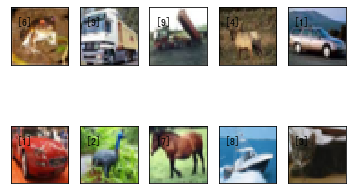

In [4]:
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(x_train[i-1])
    plt.text(3,10,str(y_train[i-1]))
    plt.xticks([])
    plt.yticks([])
plt.show()

**Datasets**

In [5]:
from tensorflow.keras.utils import to_categorical

In [6]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [7]:
(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((50000, 32, 32, 3), (50000, 1)), ((10000, 32, 32, 3), (10000, 1)))

In [8]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [9]:
(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((50000, 32, 32, 3), (50000, 10)), ((10000, 32, 32, 3), (10000, 10)))

**Model**

In [10]:
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Dense,
                                     Flatten, Dropout)

In [11]:
# Hyperparameters

BATCH_SIZE = 128
EPOCHS = 2000
LEARNING_RATE = 1e-3

LeNet5

In [12]:
def lenet5():
    """
    LeNet5
    """
    inputs = keras.Input(shape=(32, 32, 3))

    # layer_1 convolution, pooling
    conv_1 = Conv2D(filters=6, kernel_size=(5, 5), activation='relu')(inputs)
    pooling_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)

    # layer_2 convolution, pooling
    conv_2 = Conv2D(filters=16, kernel_size=(5, 5), activation='relu')(pooling_1)
    pooling_2 = MaxPooling2D(pool_size=(2, 2))(conv_2)

    # layer_3 full connection
    flatten = Flatten()(pooling_2)
    dense_3 = Dense(units=120, activation='relu')(flatten)

    # layer_4 full connection
    dense_4 = Dense(units=84, activation='relu')(dense_3)

    # layer_5 output
    outputs = Dense(units=10, activation='softmax')(dense_4)

    return keras.Model(inputs=inputs, outputs=outputs)

In [13]:
img_clf_lenet5 = lenet5()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [14]:
img_clf_lenet5.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120 

In [15]:
from tensorflow.keras.layers import BatchNormalization

In [16]:
def lenet5_with_bn():
    """
    LeNet5
    """
    inputs = keras.Input(shape=(32, 32, 3))

    # layer_1 convolution, pooling
    conv_1 = Conv2D(filters=6, kernel_size=(5, 5), activation='relu')(inputs)
    pooling_1 = MaxPooling2D(pool_size=(2, 2))(BatchNormalization()(conv_1))

    # layer_2 convolution, pooling
    conv_2 = Conv2D(filters=16, kernel_size=(5, 5), activation='relu')(pooling_1)
    pooling_2 = MaxPooling2D(pool_size=(2, 2))(BatchNormalization()(conv_2))

    # layer_3 full connection
    flatten = Flatten()(pooling_2)
    dense_3 = Dense(units=120, activation='relu')(flatten)

    # layer_4 full connection
    dense_4 = Dense(units=84, activation='relu')(BatchNormalization()(dense_3))

    # layer_5 output
    outputs = Dense(units=10, activation='softmax')(BatchNormalization()(dense_4))

    return keras.Model(inputs=inputs, outputs=outputs)

In [17]:
lenet5_clf_with_bn_model = lenet5_with_bn()

In [18]:
lenet5_clf_with_bn_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 6)         24        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 10, 16)        64        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 16)          0   

模型可视化

In [29]:
# plot_model?

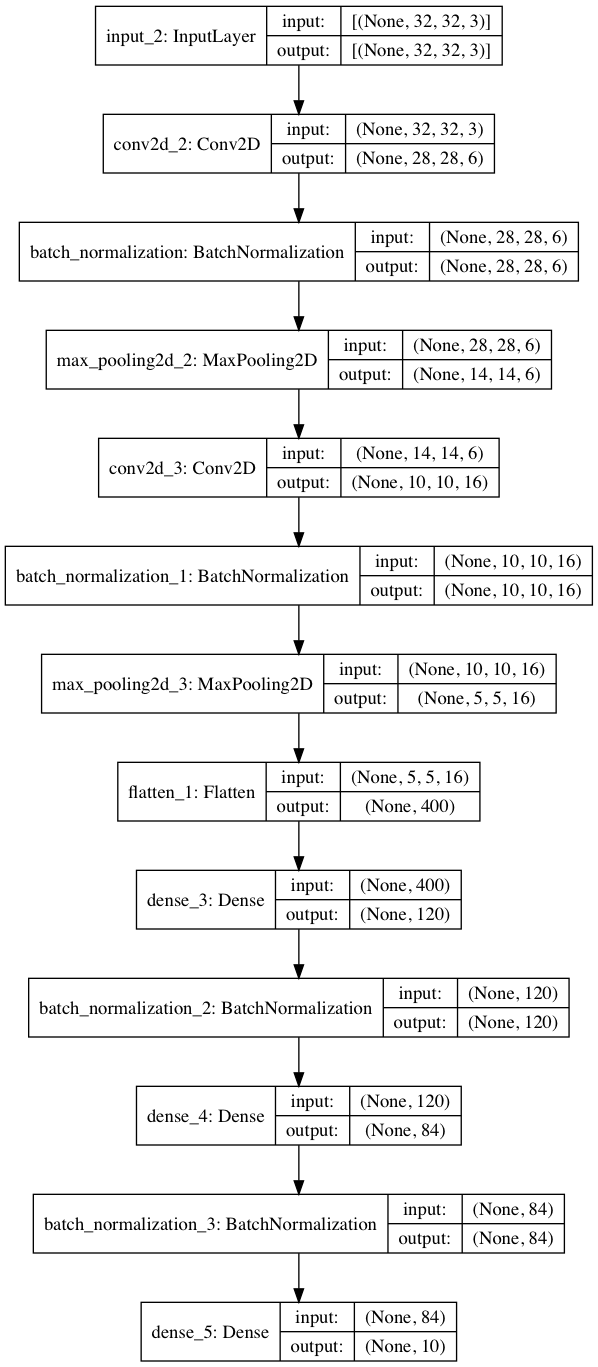

In [28]:
from tensorflow.keras.utils import plot_model

plot_model(lenet5_clf_with_bn_model, to_file='lenet5_bn_model.png', show_shapes=True)

**Train**

In [59]:
import pylab as pl
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras.callbacks import Callback

In [92]:
img_clf_lenet5_bn = lenet5_with_bn()

img_clf_lenet5_bn.compile(optimizer=optimizers.SGD(learning_rate=LEARNING_RATE),
                          loss=losses.categorical_crossentropy,
                          metrics=['accuracy'])

# train_history = img_clf_lenet5_bn.fit(x_train, y_train, batch_size=BATCH_SIZE, 
#                                       epochs=EPOCHS, workers=4,
#                                       validation_split=0.25)
# img_clf_lenet5_bn.save('lenet5_bn.model')

Train on 37500 samples, validate on 12500 samples
Epoch 1/2000
37500/37500 [==============================] - 35s 946us/sample - loss: 2.5858 - acc: 0.1609 - val_loss: 2.2600 - val_acc: 0.2006
Epoch 2/2000
37500/37500 [==============================] - 40s 1ms/sample - loss: 2.2409 - acc: 0.2319 - val_loss: 2.0817 - val_acc: 0.2609
Epoch 3/2000
37500/37500 [==============================] - 33s 881us/sample - loss: 2.0704 - acc: 0.2724 - val_loss: 1.9939 - val_acc: 0.2895
Epoch 4/2000
37500/37500 [==============================] - 801s 21ms/sample - loss: 1.9633 - acc: 0.3015 - val_loss: 1.9223 - val_acc: 0.3105
Epoch 5/2000
37500/37500 [==============================] - 31s 829us/sample - loss: 1.8917 - acc: 0.3261 - val_loss: 1.8739 - val_acc: 0.3286
Epoch 6/2000
37500/37500 [==============================] - 925s 25ms/sample - loss: 1.8358 - acc: 0.3434 - val_loss: 1.8338 - val_acc: 0.3423
Epoch 7/2000
37500/37500 [==============================] - 30s 791us/sample - loss: 1.7947 - 

Epoch 58/2000
37500/37500 [==============================] - 30s 794us/sample - loss: 1.3137 - acc: 0.5347 - val_loss: 1.3921 - val_acc: 0.5094
Epoch 59/2000
37500/37500 [==============================] - 38s 1ms/sample - loss: 1.3079 - acc: 0.5350 - val_loss: 1.4074 - val_acc: 0.5030
Epoch 60/2000
37500/37500 [==============================] - 34s 918us/sample - loss: 1.3033 - acc: 0.5377 - val_loss: 1.3816 - val_acc: 0.5122
Epoch 61/2000
37500/37500 [==============================] - 35s 937us/sample - loss: 1.2980 - acc: 0.5380 - val_loss: 1.3954 - val_acc: 0.5093
Epoch 62/2000
37500/37500 [==============================] - 35s 947us/sample - loss: 1.2960 - acc: 0.5426 - val_loss: 1.3973 - val_acc: 0.5087
Epoch 63/2000
37500/37500 [==============================] - 36s 956us/sample - loss: 1.2917 - acc: 0.5420 - val_loss: 1.4478 - val_acc: 0.4891
Epoch 64/2000
37500/37500 [==============================] - 36s 960us/sample - loss: 1.2875 - acc: 0.5427 - val_loss: 1.3701 - val_acc: 0

37500/37500 [==============================] - 36s 957us/sample - loss: 1.1373 - acc: 0.6013 - val_loss: 1.2775 - val_acc: 0.5542
Epoch 116/2000
37500/37500 [==============================] - 36s 967us/sample - loss: 1.1352 - acc: 0.6008 - val_loss: 1.2740 - val_acc: 0.5538
Epoch 117/2000
37500/37500 [==============================] - 37s 975us/sample - loss: 1.1321 - acc: 0.6018 - val_loss: 1.2977 - val_acc: 0.5497
Epoch 118/2000
37500/37500 [==============================] - 36s 961us/sample - loss: 1.1273 - acc: 0.6041 - val_loss: 1.3393 - val_acc: 0.5360
Epoch 119/2000
37500/37500 [==============================] - 37s 976us/sample - loss: 1.1277 - acc: 0.6026 - val_loss: 1.2865 - val_acc: 0.5545
Epoch 120/2000
37500/37500 [==============================] - 36s 967us/sample - loss: 1.1248 - acc: 0.6043 - val_loss: 1.2677 - val_acc: 0.5580
Epoch 121/2000
37500/37500 [==============================] - 37s 978us/sample - loss: 1.1233 - acc: 0.6064 - val_loss: 1.2713 - val_acc: 0.5578


Epoch 172/2000
37500/37500 [==============================] - 43s 1ms/sample - loss: 1.0266 - acc: 0.6389 - val_loss: 1.2336 - val_acc: 0.5724
Epoch 173/2000
37500/37500 [==============================] - 44s 1ms/sample - loss: 1.0260 - acc: 0.6406 - val_loss: 1.2443 - val_acc: 0.5694
Epoch 174/2000
37500/37500 [==============================] - 44s 1ms/sample - loss: 1.0228 - acc: 0.6408 - val_loss: 1.2726 - val_acc: 0.5615
Epoch 175/2000
37500/37500 [==============================] - 45s 1ms/sample - loss: 1.0227 - acc: 0.6409 - val_loss: 1.2246 - val_acc: 0.5757
Epoch 176/2000
37500/37500 [==============================] - 45s 1ms/sample - loss: 1.0213 - acc: 0.6410 - val_loss: 1.2254 - val_acc: 0.5738
Epoch 177/2000
37500/37500 [==============================] - 46s 1ms/sample - loss: 1.0176 - acc: 0.6432 - val_loss: 1.2314 - val_acc: 0.5745
Epoch 178/2000
37500/37500 [==============================] - 46s 1ms/sample - loss: 1.0157 - acc: 0.6439 - val_loss: 1.2872 - val_acc: 0.5546

37500/37500 [==============================] - 53s 1ms/sample - loss: 0.9425 - acc: 0.6687 - val_loss: 1.2363 - val_acc: 0.5748
Epoch 230/2000
37500/37500 [==============================] - 53s 1ms/sample - loss: 0.9400 - acc: 0.6703 - val_loss: 1.2073 - val_acc: 0.5848
Epoch 231/2000
37500/37500 [==============================] - 53s 1ms/sample - loss: 0.9416 - acc: 0.6695 - val_loss: 1.2132 - val_acc: 0.5814
Epoch 232/2000
37500/37500 [==============================] - 53s 1ms/sample - loss: 0.9358 - acc: 0.6725 - val_loss: 1.2036 - val_acc: 0.5836
Epoch 233/2000
37500/37500 [==============================] - 53s 1ms/sample - loss: 0.9362 - acc: 0.6708 - val_loss: 1.2138 - val_acc: 0.5787
Epoch 234/2000
37500/37500 [==============================] - 368s 10ms/sample - loss: 0.9328 - acc: 0.6729 - val_loss: 1.1973 - val_acc: 0.5861
Epoch 235/2000
37500/37500 [==============================] - 35s 927us/sample - loss: 0.9331 - acc: 0.6716 - val_loss: 1.2131 - val_acc: 0.5822
Epoch 236/

37500/37500 [==============================] - 32s 841us/sample - loss: 0.8715 - acc: 0.6965 - val_loss: 1.2145 - val_acc: 0.5833
Epoch 286/2000
37500/37500 [==============================] - 31s 835us/sample - loss: 0.8689 - acc: 0.6963 - val_loss: 1.2248 - val_acc: 0.5816
Epoch 287/2000
37500/37500 [==============================] - 31s 822us/sample - loss: 0.8699 - acc: 0.6965 - val_loss: 1.2078 - val_acc: 0.5889
Epoch 288/2000
37500/37500 [==============================] - 31s 814us/sample - loss: 0.8684 - acc: 0.6962 - val_loss: 1.1971 - val_acc: 0.5870
Epoch 289/2000
37500/37500 [==============================] - 31s 818us/sample - loss: 0.8677 - acc: 0.6960 - val_loss: 1.2101 - val_acc: 0.5842
Epoch 290/2000
37500/37500 [==============================] - 31s 817us/sample - loss: 0.8652 - acc: 0.6982 - val_loss: 1.1957 - val_acc: 0.5865
Epoch 291/2000
37500/37500 [==============================] - 30s 813us/sample - loss: 0.8605 - acc: 0.6987 - val_loss: 1.1914 - val_acc: 0.5890


37500/37500 [==============================] - 31s 815us/sample - loss: 0.8077 - acc: 0.7201 - val_loss: 1.2016 - val_acc: 0.5909
Epoch 342/2000
37500/37500 [==============================] - 31s 818us/sample - loss: 0.8060 - acc: 0.7191 - val_loss: 1.2031 - val_acc: 0.5909
Epoch 343/2000
37500/37500 [==============================] - 30s 809us/sample - loss: 0.8054 - acc: 0.7194 - val_loss: 1.2207 - val_acc: 0.5864
Epoch 344/2000
37500/37500 [==============================] - 31s 814us/sample - loss: 0.8072 - acc: 0.7190 - val_loss: 1.2068 - val_acc: 0.5909
Epoch 345/2000
37500/37500 [==============================] - 30s 813us/sample - loss: 0.8023 - acc: 0.7206 - val_loss: 1.2428 - val_acc: 0.5851
Epoch 346/2000
37500/37500 [==============================] - 30s 809us/sample - loss: 0.8040 - acc: 0.7203 - val_loss: 1.2076 - val_acc: 0.5884
Epoch 347/2000
37500/37500 [==============================] - 30s 811us/sample - loss: 0.8019 - acc: 0.7207 - val_loss: 1.2043 - val_acc: 0.5919


37500/37500 [==============================] - 31s 814us/sample - loss: 0.7512 - acc: 0.7395 - val_loss: 1.2274 - val_acc: 0.5897
Epoch 398/2000
37500/37500 [==============================] - 30s 813us/sample - loss: 0.7470 - acc: 0.7421 - val_loss: 1.2757 - val_acc: 0.5780
Epoch 399/2000
37500/37500 [==============================] - 30s 813us/sample - loss: 0.7464 - acc: 0.7419 - val_loss: 1.2563 - val_acc: 0.5847
Epoch 400/2000
37500/37500 [==============================] - 31s 815us/sample - loss: 0.7437 - acc: 0.7454 - val_loss: 1.2767 - val_acc: 0.5788
Epoch 401/2000
37500/37500 [==============================] - 30s 812us/sample - loss: 0.7450 - acc: 0.7438 - val_loss: 1.2221 - val_acc: 0.5925
Epoch 402/2000
37500/37500 [==============================] - 30s 813us/sample - loss: 0.7412 - acc: 0.7430 - val_loss: 1.2515 - val_acc: 0.5855
Epoch 403/2000
37500/37500 [==============================] - 31s 819us/sample - loss: 0.7398 - acc: 0.7443 - val_loss: 1.2235 - val_acc: 0.5906


37500/37500 [==============================] - 30s 811us/sample - loss: 0.6936 - acc: 0.7602 - val_loss: 1.3205 - val_acc: 0.5778
Epoch 454/2000
37500/37500 [==============================] - 31s 818us/sample - loss: 0.6936 - acc: 0.7597 - val_loss: 1.2551 - val_acc: 0.5928
Epoch 455/2000
37500/37500 [==============================] - 31s 821us/sample - loss: 0.6884 - acc: 0.7631 - val_loss: 1.2656 - val_acc: 0.5878
Epoch 456/2000
37500/37500 [==============================] - 31s 820us/sample - loss: 0.6897 - acc: 0.7615 - val_loss: 1.2807 - val_acc: 0.5858
Epoch 457/2000
37500/37500 [==============================] - 31s 820us/sample - loss: 0.6887 - acc: 0.7639 - val_loss: 1.2585 - val_acc: 0.5890
Epoch 458/2000
37500/37500 [==============================] - 31s 821us/sample - loss: 0.6848 - acc: 0.7662 - val_loss: 1.2635 - val_acc: 0.5899
Epoch 459/2000
37500/37500 [==============================] - 31s 814us/sample - loss: 0.6872 - acc: 0.7637 - val_loss: 1.2765 - val_acc: 0.5840


37500/37500 [==============================] - 31s 825us/sample - loss: 0.6374 - acc: 0.7812 - val_loss: 1.3322 - val_acc: 0.5817
Epoch 510/2000
37500/37500 [==============================] - 31s 816us/sample - loss: 0.6374 - acc: 0.7824 - val_loss: 1.3369 - val_acc: 0.5802
Epoch 511/2000
37500/37500 [==============================] - 31s 836us/sample - loss: 0.6378 - acc: 0.7811 - val_loss: 1.3045 - val_acc: 0.5878
Epoch 512/2000
37500/37500 [==============================] - 31s 832us/sample - loss: 0.6386 - acc: 0.7808 - val_loss: 1.3106 - val_acc: 0.5865
Epoch 513/2000
37500/37500 [==============================] - 31s 831us/sample - loss: 0.6364 - acc: 0.7830 - val_loss: 1.3115 - val_acc: 0.5872
Epoch 514/2000
37500/37500 [==============================] - 31s 827us/sample - loss: 0.6339 - acc: 0.7825 - val_loss: 1.2957 - val_acc: 0.5885
Epoch 515/2000
37500/37500 [==============================] - 31s 815us/sample - loss: 0.6382 - acc: 0.7794 - val_loss: 1.3765 - val_acc: 0.5750


37500/37500 [==============================] - 31s 826us/sample - loss: 0.5895 - acc: 0.8008 - val_loss: 1.3371 - val_acc: 0.5880
Epoch 566/2000
37500/37500 [==============================] - 31s 821us/sample - loss: 0.5891 - acc: 0.7986 - val_loss: 1.3652 - val_acc: 0.5822
Epoch 567/2000
37500/37500 [==============================] - 31s 816us/sample - loss: 0.5865 - acc: 0.8005 - val_loss: 1.3395 - val_acc: 0.5836
Epoch 568/2000
37500/37500 [==============================] - 31s 814us/sample - loss: 0.5882 - acc: 0.7991 - val_loss: 1.3378 - val_acc: 0.5886
Epoch 569/2000
37500/37500 [==============================] - 31s 822us/sample - loss: 0.5835 - acc: 0.8022 - val_loss: 1.4286 - val_acc: 0.5723
Epoch 570/2000
37500/37500 [==============================] - 30s 813us/sample - loss: 0.5822 - acc: 0.8026 - val_loss: 1.3476 - val_acc: 0.5854
Epoch 571/2000
37500/37500 [==============================] - 31s 815us/sample - loss: 0.5820 - acc: 0.8026 - val_loss: 1.3561 - val_acc: 0.5847


37500/37500 [==============================] - 30s 812us/sample - loss: 0.5377 - acc: 0.8190 - val_loss: 1.3881 - val_acc: 0.5842
Epoch 622/2000
37500/37500 [==============================] - 31s 816us/sample - loss: 0.5362 - acc: 0.8182 - val_loss: 1.4248 - val_acc: 0.5790
Epoch 623/2000
37500/37500 [==============================] - 31s 821us/sample - loss: 0.5383 - acc: 0.8178 - val_loss: 1.3948 - val_acc: 0.5838
Epoch 624/2000
37500/37500 [==============================] - 31s 819us/sample - loss: 0.5386 - acc: 0.8187 - val_loss: 1.4039 - val_acc: 0.5814
Epoch 625/2000
37500/37500 [==============================] - 30s 809us/sample - loss: 0.5367 - acc: 0.8190 - val_loss: 1.5053 - val_acc: 0.5634
Epoch 626/2000
37500/37500 [==============================] - 30s 811us/sample - loss: 0.5330 - acc: 0.8222 - val_loss: 1.3918 - val_acc: 0.5820
Epoch 627/2000
37500/37500 [==============================] - 30s 809us/sample - loss: 0.5335 - acc: 0.8182 - val_loss: 1.3923 - val_acc: 0.5854


37500/37500 [==============================] - 31s 816us/sample - loss: 0.4949 - acc: 0.8336 - val_loss: 1.4441 - val_acc: 0.5820
Epoch 678/2000
37500/37500 [==============================] - 31s 822us/sample - loss: 0.4950 - acc: 0.8333 - val_loss: 1.4428 - val_acc: 0.5798
Epoch 679/2000
37500/37500 [==============================] - 31s 820us/sample - loss: 0.4904 - acc: 0.8368 - val_loss: 1.4575 - val_acc: 0.5780
Epoch 680/2000
37500/37500 [==============================] - 31s 818us/sample - loss: 0.4905 - acc: 0.8344 - val_loss: 1.4351 - val_acc: 0.5852
Epoch 681/2000
37500/37500 [==============================] - 31s 815us/sample - loss: 0.4912 - acc: 0.8357 - val_loss: 1.4470 - val_acc: 0.5810
Epoch 682/2000
37500/37500 [==============================] - 30s 809us/sample - loss: 0.4898 - acc: 0.8353 - val_loss: 1.4462 - val_acc: 0.5827
Epoch 683/2000
37500/37500 [==============================] - 31s 815us/sample - loss: 0.4856 - acc: 0.8385 - val_loss: 1.4455 - val_acc: 0.5829


37500/37500 [==============================] - 30s 813us/sample - loss: 0.4471 - acc: 0.8501 - val_loss: 1.5019 - val_acc: 0.5826
Epoch 734/2000
37500/37500 [==============================] - 31s 814us/sample - loss: 0.4478 - acc: 0.8517 - val_loss: 1.4947 - val_acc: 0.5823
Epoch 735/2000
37500/37500 [==============================] - 31s 813us/sample - loss: 0.4457 - acc: 0.8508 - val_loss: 1.5060 - val_acc: 0.5819
Epoch 736/2000
37500/37500 [==============================] - 30s 811us/sample - loss: 0.4450 - acc: 0.8509 - val_loss: 1.5119 - val_acc: 0.5793
Epoch 737/2000
37500/37500 [==============================] - 30s 813us/sample - loss: 0.4485 - acc: 0.8490 - val_loss: 1.5235 - val_acc: 0.5768
Epoch 738/2000
37500/37500 [==============================] - 31s 815us/sample - loss: 0.4500 - acc: 0.8489 - val_loss: 1.5661 - val_acc: 0.5675
Epoch 739/2000
37500/37500 [==============================] - 31s 817us/sample - loss: 0.4450 - acc: 0.8502 - val_loss: 1.5053 - val_acc: 0.5826


37500/37500 [==============================] - 31s 825us/sample - loss: 0.4073 - acc: 0.8661 - val_loss: 1.5859 - val_acc: 0.5750
Epoch 790/2000
37500/37500 [==============================] - 31s 821us/sample - loss: 0.4112 - acc: 0.8635 - val_loss: 1.6212 - val_acc: 0.5689
Epoch 791/2000
37500/37500 [==============================] - 31s 814us/sample - loss: 0.4080 - acc: 0.8634 - val_loss: 1.5735 - val_acc: 0.5790
Epoch 792/2000
37500/37500 [==============================] - 30s 812us/sample - loss: 0.4063 - acc: 0.8669 - val_loss: 1.5829 - val_acc: 0.5749
Epoch 793/2000
37500/37500 [==============================] - 31s 817us/sample - loss: 0.4059 - acc: 0.8639 - val_loss: 1.6303 - val_acc: 0.5653
Epoch 794/2000
37500/37500 [==============================] - 31s 819us/sample - loss: 0.4066 - acc: 0.8657 - val_loss: 1.5709 - val_acc: 0.5790
Epoch 795/2000
37500/37500 [==============================] - 31s 827us/sample - loss: 0.4057 - acc: 0.8648 - val_loss: 1.5749 - val_acc: 0.5742


37500/37500 [==============================] - 31s 826us/sample - loss: 0.3712 - acc: 0.8781 - val_loss: 1.6326 - val_acc: 0.5762
Epoch 846/2000
37500/37500 [==============================] - 31s 815us/sample - loss: 0.3722 - acc: 0.8775 - val_loss: 1.6276 - val_acc: 0.5774
Epoch 847/2000
37500/37500 [==============================] - 31s 817us/sample - loss: 0.3673 - acc: 0.8808 - val_loss: 1.6397 - val_acc: 0.5744
Epoch 848/2000
37500/37500 [==============================] - 30s 813us/sample - loss: 0.3638 - acc: 0.8826 - val_loss: 1.6559 - val_acc: 0.5736
Epoch 849/2000
37500/37500 [==============================] - 31s 818us/sample - loss: 0.3711 - acc: 0.8769 - val_loss: 1.6479 - val_acc: 0.5741
Epoch 850/2000
37500/37500 [==============================] - 31s 814us/sample - loss: 0.3665 - acc: 0.8810 - val_loss: 1.6342 - val_acc: 0.5764
Epoch 851/2000
37500/37500 [==============================] - 31s 818us/sample - loss: 0.3665 - acc: 0.8820 - val_loss: 1.6455 - val_acc: 0.5736


37500/37500 [==============================] - 30s 813us/sample - loss: 0.3312 - acc: 0.8934 - val_loss: 1.7200 - val_acc: 0.5716
Epoch 902/2000
37500/37500 [==============================] - 31s 818us/sample - loss: 0.3289 - acc: 0.8947 - val_loss: 1.7198 - val_acc: 0.5710
Epoch 903/2000
37500/37500 [==============================] - 30s 813us/sample - loss: 0.3297 - acc: 0.8939 - val_loss: 1.7176 - val_acc: 0.5704
Epoch 904/2000
37500/37500 [==============================] - 31s 822us/sample - loss: 0.3317 - acc: 0.8919 - val_loss: 1.7158 - val_acc: 0.5712
Epoch 905/2000
37500/37500 [==============================] - 31s 817us/sample - loss: 0.3286 - acc: 0.8941 - val_loss: 1.7158 - val_acc: 0.5722
Epoch 906/2000
37500/37500 [==============================] - 30s 813us/sample - loss: 0.3293 - acc: 0.8921 - val_loss: 1.7284 - val_acc: 0.5688
Epoch 907/2000
37500/37500 [==============================] - 30s 808us/sample - loss: 0.3335 - acc: 0.8917 - val_loss: 1.7178 - val_acc: 0.5729


37500/37500 [==============================] - 31s 816us/sample - loss: 0.2999 - acc: 0.9032 - val_loss: 1.7892 - val_acc: 0.5677
Epoch 958/2000
37500/37500 [==============================] - 30s 807us/sample - loss: 0.3006 - acc: 0.9033 - val_loss: 1.8027 - val_acc: 0.5666
Epoch 959/2000
37500/37500 [==============================] - 31s 817us/sample - loss: 0.2996 - acc: 0.9051 - val_loss: 1.8108 - val_acc: 0.5693
Epoch 960/2000
37500/37500 [==============================] - 30s 807us/sample - loss: 0.2980 - acc: 0.9058 - val_loss: 1.7960 - val_acc: 0.5686
Epoch 961/2000
37500/37500 [==============================] - 30s 812us/sample - loss: 0.2982 - acc: 0.9048 - val_loss: 1.8095 - val_acc: 0.5664
Epoch 962/2000
37500/37500 [==============================] - 31s 815us/sample - loss: 0.2981 - acc: 0.9041 - val_loss: 1.7888 - val_acc: 0.5694
Epoch 963/2000
37500/37500 [==============================] - 31s 813us/sample - loss: 0.2976 - acc: 0.9045 - val_loss: 1.7979 - val_acc: 0.5694


37500/37500 [==============================] - 31s 822us/sample - loss: 0.2726 - acc: 0.9127 - val_loss: 1.8661 - val_acc: 0.5668
Epoch 1014/2000
37500/37500 [==============================] - 31s 819us/sample - loss: 0.2696 - acc: 0.9150 - val_loss: 1.8969 - val_acc: 0.5631
Epoch 1015/2000
37500/37500 [==============================] - 31s 817us/sample - loss: 0.2667 - acc: 0.9168 - val_loss: 1.9213 - val_acc: 0.5648
Epoch 1016/2000
37500/37500 [==============================] - 31s 816us/sample - loss: 0.2732 - acc: 0.9125 - val_loss: 1.8853 - val_acc: 0.5642
Epoch 1017/2000
37500/37500 [==============================] - 31s 814us/sample - loss: 0.2717 - acc: 0.9123 - val_loss: 1.9192 - val_acc: 0.5638
Epoch 1018/2000
37500/37500 [==============================] - 31s 818us/sample - loss: 0.2697 - acc: 0.9137 - val_loss: 1.8693 - val_acc: 0.5691
Epoch 1019/2000
37500/37500 [==============================] - 31s 816us/sample - loss: 0.2683 - acc: 0.9155 - val_loss: 1.8728 - val_acc: 0

37500/37500 [==============================] - 31s 819us/sample - loss: 0.2438 - acc: 0.9239 - val_loss: 1.9558 - val_acc: 0.5626
Epoch 1070/2000
37500/37500 [==============================] - 31s 820us/sample - loss: 0.2434 - acc: 0.9237 - val_loss: 1.9733 - val_acc: 0.5626
Epoch 1071/2000
37500/37500 [==============================] - 31s 822us/sample - loss: 0.2448 - acc: 0.9236 - val_loss: 1.9493 - val_acc: 0.5672
Epoch 1072/2000
37500/37500 [==============================] - 31s 815us/sample - loss: 0.2379 - acc: 0.9278 - val_loss: 1.9586 - val_acc: 0.5609
Epoch 1073/2000
37500/37500 [==============================] - 31s 818us/sample - loss: 0.2430 - acc: 0.9242 - val_loss: 1.9873 - val_acc: 0.5602
Epoch 1074/2000
37500/37500 [==============================] - 31s 817us/sample - loss: 0.2392 - acc: 0.9251 - val_loss: 1.9607 - val_acc: 0.5668
Epoch 1075/2000
37500/37500 [==============================] - 31s 815us/sample - loss: 0.2449 - acc: 0.9233 - val_loss: 1.9664 - val_acc: 0

37500/37500 [==============================] - 32s 841us/sample - loss: 0.2233 - acc: 0.9312 - val_loss: 2.0300 - val_acc: 0.5648
Epoch 1126/2000
37500/37500 [==============================] - 32s 841us/sample - loss: 0.2181 - acc: 0.9338 - val_loss: 2.0243 - val_acc: 0.5654
Epoch 1127/2000
37500/37500 [==============================] - 31s 835us/sample - loss: 0.2186 - acc: 0.9325 - val_loss: 2.0914 - val_acc: 0.5634
Epoch 1128/2000
37500/37500 [==============================] - 32s 841us/sample - loss: 0.2199 - acc: 0.9326 - val_loss: 2.0412 - val_acc: 0.5621
Epoch 1129/2000
37500/37500 [==============================] - 32s 842us/sample - loss: 0.2197 - acc: 0.9323 - val_loss: 2.0414 - val_acc: 0.5634
Epoch 1130/2000
37500/37500 [==============================] - 32s 846us/sample - loss: 0.2138 - acc: 0.9362 - val_loss: 2.0688 - val_acc: 0.5618
Epoch 1131/2000
37500/37500 [==============================] - 31s 838us/sample - loss: 0.2199 - acc: 0.9302 - val_loss: 2.0365 - val_acc: 0

37500/37500 [==============================] - 31s 835us/sample - loss: 0.2007 - acc: 0.9382 - val_loss: 2.1050 - val_acc: 0.5631
Epoch 1182/2000
37500/37500 [==============================] - 32s 851us/sample - loss: 0.2017 - acc: 0.9381 - val_loss: 2.1131 - val_acc: 0.5633
Epoch 1183/2000
37500/37500 [==============================] - 34s 911us/sample - loss: 0.1977 - acc: 0.9407 - val_loss: 2.1100 - val_acc: 0.5642
Epoch 1184/2000
37500/37500 [==============================] - 32s 851us/sample - loss: 0.1979 - acc: 0.9403 - val_loss: 2.1143 - val_acc: 0.5649
Epoch 1185/2000
37500/37500 [==============================] - 32s 847us/sample - loss: 0.1975 - acc: 0.9398 - val_loss: 2.1047 - val_acc: 0.5659
Epoch 1186/2000
37500/37500 [==============================] - 32s 855us/sample - loss: 0.1983 - acc: 0.9388 - val_loss: 2.1426 - val_acc: 0.5606
Epoch 1187/2000
37500/37500 [==============================] - 32s 850us/sample - loss: 0.1960 - acc: 0.9401 - val_loss: 2.1095 - val_acc: 0

37500/37500 [==============================] - 32s 847us/sample - loss: 0.1805 - acc: 0.9461 - val_loss: 2.1761 - val_acc: 0.5654
Epoch 1238/2000
37500/37500 [==============================] - 32s 841us/sample - loss: 0.1824 - acc: 0.9459 - val_loss: 2.1940 - val_acc: 0.5632
Epoch 1239/2000
37500/37500 [==============================] - 32s 848us/sample - loss: 0.1782 - acc: 0.9470 - val_loss: 2.1914 - val_acc: 0.5610
Epoch 1240/2000
37500/37500 [==============================] - 32s 843us/sample - loss: 0.1839 - acc: 0.9450 - val_loss: 2.2109 - val_acc: 0.5614
Epoch 1241/2000
37500/37500 [==============================] - 32s 844us/sample - loss: 0.1797 - acc: 0.9463 - val_loss: 2.2809 - val_acc: 0.5555
Epoch 1242/2000
37500/37500 [==============================] - 32s 845us/sample - loss: 0.1780 - acc: 0.9469 - val_loss: 2.2118 - val_acc: 0.5636
Epoch 1243/2000
37500/37500 [==============================] - 32s 845us/sample - loss: 0.1766 - acc: 0.9464 - val_loss: 2.1865 - val_acc: 0

37500/37500 [==============================] - 43s 1ms/sample - loss: 0.1650 - acc: 0.9517 - val_loss: 2.2606 - val_acc: 0.5603
Epoch 1294/2000
37500/37500 [==============================] - 42s 1ms/sample - loss: 0.1660 - acc: 0.9505 - val_loss: 2.2613 - val_acc: 0.5591
Epoch 1295/2000
37500/37500 [==============================] - 38s 1ms/sample - loss: 0.1608 - acc: 0.9527 - val_loss: 2.2606 - val_acc: 0.5634
Epoch 1296/2000
37500/37500 [==============================] - 36s 957us/sample - loss: 0.1618 - acc: 0.9533 - val_loss: 2.2603 - val_acc: 0.5610
Epoch 1297/2000
37500/37500 [==============================] - 38s 1ms/sample - loss: 0.1659 - acc: 0.9510 - val_loss: 2.2549 - val_acc: 0.5610
Epoch 1298/2000
37500/37500 [==============================] - 38s 1ms/sample - loss: 0.1612 - acc: 0.9526 - val_loss: 2.2911 - val_acc: 0.5618
Epoch 1299/2000
37500/37500 [==============================] - 40s 1ms/sample - loss: 0.1688 - acc: 0.9485 - val_loss: 2.3160 - val_acc: 0.5547
Epoch 

Epoch 1350/2000
37500/37500 [==============================] - 42s 1ms/sample - loss: 0.1480 - acc: 0.9583 - val_loss: 2.3343 - val_acc: 0.5627
Epoch 1351/2000
37500/37500 [==============================] - 42s 1ms/sample - loss: 0.1497 - acc: 0.9567 - val_loss: 2.3248 - val_acc: 0.5645
Epoch 1352/2000
37500/37500 [==============================] - 38s 1ms/sample - loss: 0.1520 - acc: 0.9561 - val_loss: 2.3438 - val_acc: 0.5541
Epoch 1353/2000
37500/37500 [==============================] - 37s 1000us/sample - loss: 0.1502 - acc: 0.9568 - val_loss: 2.3438 - val_acc: 0.5624
Epoch 1354/2000
37500/37500 [==============================] - 39s 1ms/sample - loss: 0.1473 - acc: 0.9568 - val_loss: 2.3339 - val_acc: 0.5643
Epoch 1355/2000
37500/37500 [==============================] - 42s 1ms/sample - loss: 0.1483 - acc: 0.9574 - val_loss: 2.3578 - val_acc: 0.5598
Epoch 1356/2000
37500/37500 [==============================] - 43s 1ms/sample - loss: 0.1460 - acc: 0.9578 - val_loss: 2.3321 - val_a

37500/37500 [==============================] - 31s 829us/sample - loss: 0.1385 - acc: 0.9612 - val_loss: 2.4163 - val_acc: 0.5609
Epoch 1407/2000
37500/37500 [==============================] - 32s 841us/sample - loss: 0.1363 - acc: 0.9609 - val_loss: 2.4306 - val_acc: 0.5573
Epoch 1408/2000
37500/37500 [==============================] - 30s 807us/sample - loss: 0.1362 - acc: 0.9611 - val_loss: 2.4063 - val_acc: 0.5610
Epoch 1409/2000
37500/37500 [==============================] - 30s 797us/sample - loss: 0.1376 - acc: 0.9593 - val_loss: 2.4621 - val_acc: 0.5504
Epoch 1410/2000
37500/37500 [==============================] - 30s 803us/sample - loss: 0.1347 - acc: 0.9621 - val_loss: 2.4203 - val_acc: 0.5610
Epoch 1411/2000
37500/37500 [==============================] - 30s 810us/sample - loss: 0.1357 - acc: 0.9614 - val_loss: 2.4015 - val_acc: 0.5634
Epoch 1412/2000
37500/37500 [==============================] - 30s 797us/sample - loss: 0.1358 - acc: 0.9604 - val_loss: 2.4069 - val_acc: 0

37500/37500 [==============================] - 36s 959us/sample - loss: 0.1250 - acc: 0.9653 - val_loss: 2.4812 - val_acc: 0.5606
Epoch 1463/2000
37500/37500 [==============================] - 33s 869us/sample - loss: 0.1241 - acc: 0.9652 - val_loss: 2.4630 - val_acc: 0.5609
Epoch 1464/2000
37500/37500 [==============================] - 33s 878us/sample - loss: 0.1239 - acc: 0.9663 - val_loss: 2.4685 - val_acc: 0.5598
Epoch 1465/2000
37500/37500 [==============================] - 32s 859us/sample - loss: 0.1287 - acc: 0.9619 - val_loss: 2.4752 - val_acc: 0.5617
Epoch 1466/2000
37500/37500 [==============================] - 32s 850us/sample - loss: 0.1235 - acc: 0.9654 - val_loss: 2.4740 - val_acc: 0.5609
Epoch 1467/2000
37500/37500 [==============================] - 32s 862us/sample - loss: 0.1258 - acc: 0.9627 - val_loss: 2.4591 - val_acc: 0.5635
Epoch 1468/2000
37500/37500 [==============================] - 32s 856us/sample - loss: 0.1261 - acc: 0.9643 - val_loss: 2.4957 - val_acc: 0

37500/37500 [==============================] - 36s 948us/sample - loss: 0.1171 - acc: 0.9683 - val_loss: 2.5648 - val_acc: 0.5567
Epoch 1519/2000
37500/37500 [==============================] - 32s 858us/sample - loss: 0.1155 - acc: 0.9681 - val_loss: 2.5329 - val_acc: 0.5606
Epoch 1520/2000
37500/37500 [==============================] - 31s 839us/sample - loss: 0.1167 - acc: 0.9672 - val_loss: 2.5270 - val_acc: 0.5602
Epoch 1521/2000
37500/37500 [==============================] - 31s 837us/sample - loss: 0.1161 - acc: 0.9679 - val_loss: 2.5367 - val_acc: 0.5595
Epoch 1522/2000
37500/37500 [==============================] - 34s 910us/sample - loss: 0.1177 - acc: 0.9663 - val_loss: 2.6428 - val_acc: 0.5490
Epoch 1523/2000
37500/37500 [==============================] - 35s 934us/sample - loss: 0.1153 - acc: 0.9690 - val_loss: 2.5540 - val_acc: 0.5547
Epoch 1524/2000
37500/37500 [==============================] - 33s 889us/sample - loss: 0.1165 - acc: 0.9682 - val_loss: 2.5649 - val_acc: 0

37500/37500 [==============================] - 34s 910us/sample - loss: 0.1057 - acc: 0.9708 - val_loss: 2.6143 - val_acc: 0.5611
Epoch 1575/2000
37500/37500 [==============================] - 33s 885us/sample - loss: 0.1076 - acc: 0.9693 - val_loss: 2.6126 - val_acc: 0.5590
Epoch 1576/2000
37500/37500 [==============================] - 32s 843us/sample - loss: 0.1032 - acc: 0.9722 - val_loss: 2.6025 - val_acc: 0.5594
Epoch 1577/2000
37500/37500 [==============================] - 32s 847us/sample - loss: 0.1062 - acc: 0.9712 - val_loss: 2.6239 - val_acc: 0.5605
Epoch 1578/2000
37500/37500 [==============================] - 33s 892us/sample - loss: 0.1053 - acc: 0.9719 - val_loss: 2.5970 - val_acc: 0.5607
Epoch 1579/2000
37500/37500 [==============================] - 36s 972us/sample - loss: 0.1065 - acc: 0.9709 - val_loss: 2.6269 - val_acc: 0.5547
Epoch 1580/2000
37500/37500 [==============================] - 35s 924us/sample - loss: 0.1060 - acc: 0.9704 - val_loss: 2.6378 - val_acc: 0

37500/37500 [==============================] - 32s 859us/sample - loss: 0.1020 - acc: 0.9727 - val_loss: 2.6700 - val_acc: 0.5556
Epoch 1631/2000
37500/37500 [==============================] - 34s 900us/sample - loss: 0.0960 - acc: 0.9747 - val_loss: 2.6617 - val_acc: 0.5583
Epoch 1632/2000
37500/37500 [==============================] - 34s 897us/sample - loss: 0.1030 - acc: 0.9701 - val_loss: 2.7149 - val_acc: 0.5586
Epoch 1633/2000
37500/37500 [==============================] - 44s 1ms/sample - loss: 0.1013 - acc: 0.9730 - val_loss: 2.6553 - val_acc: 0.5590
Epoch 1634/2000
37500/37500 [==============================] - 41s 1ms/sample - loss: 0.1005 - acc: 0.9729 - val_loss: 2.6586 - val_acc: 0.5588
Epoch 1635/2000
37500/37500 [==============================] - 40s 1ms/sample - loss: 0.1008 - acc: 0.9727 - val_loss: 2.6705 - val_acc: 0.5569
Epoch 1636/2000
37500/37500 [==============================] - 39s 1ms/sample - loss: 0.0967 - acc: 0.9746 - val_loss: 2.6599 - val_acc: 0.5591
Ep

37500/37500 [==============================] - 31s 835us/sample - loss: 0.0944 - acc: 0.9745 - val_loss: 2.7089 - val_acc: 0.5623
Epoch 1687/2000
37500/37500 [==============================] - 31s 831us/sample - loss: 0.0947 - acc: 0.9749 - val_loss: 2.7093 - val_acc: 0.5587
Epoch 1688/2000
37500/37500 [==============================] - 31s 828us/sample - loss: 0.0951 - acc: 0.9739 - val_loss: 2.7098 - val_acc: 0.5587
Epoch 1689/2000
37500/37500 [==============================] - 31s 828us/sample - loss: 0.0929 - acc: 0.9758 - val_loss: 2.7279 - val_acc: 0.5603
Epoch 1690/2000
37500/37500 [==============================] - 31s 831us/sample - loss: 0.0965 - acc: 0.9738 - val_loss: 2.7371 - val_acc: 0.5563
Epoch 1691/2000
37500/37500 [==============================] - 31s 827us/sample - loss: 0.0963 - acc: 0.9742 - val_loss: 2.7490 - val_acc: 0.5577
Epoch 1692/2000
37500/37500 [==============================] - 31s 833us/sample - loss: 0.0933 - acc: 0.9750 - val_loss: 2.7329 - val_acc: 0

37500/37500 [==============================] - 36s 952us/sample - loss: 0.0887 - acc: 0.9762 - val_loss: 2.7782 - val_acc: 0.5598
Epoch 1743/2000
37500/37500 [==============================] - 33s 882us/sample - loss: 0.0890 - acc: 0.9757 - val_loss: 2.7805 - val_acc: 0.5598
Epoch 1744/2000
37500/37500 [==============================] - 35s 929us/sample - loss: 0.0891 - acc: 0.9756 - val_loss: 2.7938 - val_acc: 0.5597
Epoch 1745/2000
37500/37500 [==============================] - 36s 952us/sample - loss: 0.0898 - acc: 0.9753 - val_loss: 2.7856 - val_acc: 0.5580
Epoch 1746/2000
37500/37500 [==============================] - 32s 847us/sample - loss: 0.0868 - acc: 0.9774 - val_loss: 2.7781 - val_acc: 0.5607
Epoch 1747/2000
37500/37500 [==============================] - 31s 829us/sample - loss: 0.0875 - acc: 0.9767 - val_loss: 2.7740 - val_acc: 0.5591
Epoch 1748/2000
37500/37500 [==============================] - 32s 848us/sample - loss: 0.0870 - acc: 0.9768 - val_loss: 2.7867 - val_acc: 0

37500/37500 [==============================] - 31s 838us/sample - loss: 0.0833 - acc: 0.9786 - val_loss: 2.8023 - val_acc: 0.5590
Epoch 1799/2000
37500/37500 [==============================] - 32s 856us/sample - loss: 0.0815 - acc: 0.9780 - val_loss: 2.8187 - val_acc: 0.5571
Epoch 1800/2000
37500/37500 [==============================] - 33s 888us/sample - loss: 0.0808 - acc: 0.9782 - val_loss: 2.8392 - val_acc: 0.5563
Epoch 1801/2000
37500/37500 [==============================] - 35s 942us/sample - loss: 0.0812 - acc: 0.9789 - val_loss: 2.8153 - val_acc: 0.5598
Epoch 1802/2000
37500/37500 [==============================] - 34s 906us/sample - loss: 0.0799 - acc: 0.9787 - val_loss: 2.8297 - val_acc: 0.5597
Epoch 1803/2000
37500/37500 [==============================] - 35s 925us/sample - loss: 0.0779 - acc: 0.9797 - val_loss: 2.8419 - val_acc: 0.5582
Epoch 1804/2000
37500/37500 [==============================] - 35s 923us/sample - loss: 0.0845 - acc: 0.9775 - val_loss: 2.8488 - val_acc: 0

37500/37500 [==============================] - 32s 850us/sample - loss: 0.0813 - acc: 0.9782 - val_loss: 2.8712 - val_acc: 0.5564
Epoch 1855/2000
37500/37500 [==============================] - 32s 844us/sample - loss: 0.0776 - acc: 0.9794 - val_loss: 2.8695 - val_acc: 0.5558
Epoch 1856/2000
37500/37500 [==============================] - 33s 874us/sample - loss: 0.0729 - acc: 0.9814 - val_loss: 2.8687 - val_acc: 0.5587
Epoch 1857/2000
37500/37500 [==============================] - 32s 866us/sample - loss: 0.0805 - acc: 0.9771 - val_loss: 2.8748 - val_acc: 0.5570
Epoch 1858/2000
37500/37500 [==============================] - 33s 867us/sample - loss: 0.0794 - acc: 0.9784 - val_loss: 2.8751 - val_acc: 0.5590
Epoch 1859/2000
37500/37500 [==============================] - 33s 870us/sample - loss: 0.0772 - acc: 0.9797 - val_loss: 2.9057 - val_acc: 0.5483
Epoch 1860/2000
37500/37500 [==============================] - 33s 880us/sample - loss: 0.0781 - acc: 0.9798 - val_loss: 2.9031 - val_acc: 0

37500/37500 [==============================] - 38s 1ms/sample - loss: 0.0735 - acc: 0.9807 - val_loss: 2.9315 - val_acc: 0.5582
Epoch 1911/2000
37500/37500 [==============================] - 33s 892us/sample - loss: 0.0719 - acc: 0.9816 - val_loss: 2.9103 - val_acc: 0.5585
Epoch 1912/2000
37500/37500 [==============================] - 34s 918us/sample - loss: 0.0779 - acc: 0.9788 - val_loss: 2.9045 - val_acc: 0.5539
Epoch 1913/2000
37500/37500 [==============================] - 32s 865us/sample - loss: 0.0742 - acc: 0.9809 - val_loss: 2.9492 - val_acc: 0.5590
Epoch 1914/2000
37500/37500 [==============================] - 33s 890us/sample - loss: 0.0744 - acc: 0.9797 - val_loss: 2.9531 - val_acc: 0.5589
Epoch 1915/2000
37500/37500 [==============================] - 34s 912us/sample - loss: 0.0741 - acc: 0.9809 - val_loss: 2.9240 - val_acc: 0.5570
Epoch 1916/2000
37500/37500 [==============================] - 34s 896us/sample - loss: 0.0754 - acc: 0.9794 - val_loss: 2.9286 - val_acc: 0.5

37500/37500 [==============================] - 32s 865us/sample - loss: 0.0683 - acc: 0.9822 - val_loss: 2.9663 - val_acc: 0.5562
Epoch 1967/2000
37500/37500 [==============================] - 33s 870us/sample - loss: 0.0700 - acc: 0.9818 - val_loss: 2.9811 - val_acc: 0.5534
Epoch 1968/2000
37500/37500 [==============================] - 35s 926us/sample - loss: 0.0700 - acc: 0.9806 - val_loss: 2.9655 - val_acc: 0.5567
Epoch 1969/2000
37500/37500 [==============================] - 32s 865us/sample - loss: 0.0695 - acc: 0.9814 - val_loss: 2.9637 - val_acc: 0.5570
Epoch 1970/2000
37500/37500 [==============================] - 33s 867us/sample - loss: 0.0709 - acc: 0.9805 - val_loss: 2.9876 - val_acc: 0.5559
Epoch 1971/2000
37500/37500 [==============================] - 33s 885us/sample - loss: 0.0678 - acc: 0.9822 - val_loss: 2.9699 - val_acc: 0.5525
Epoch 1972/2000
37500/37500 [==============================] - 34s 905us/sample - loss: 0.0705 - acc: 0.9813 - val_loss: 2.9769 - val_acc: 0

可视化

In [135]:
import json
from json import JSONEncoder
import pickle

In [165]:
class FloatEncoder(JSONEncoder):
    def default(self, o):
        if isinstance(o, (np.float, np.float32, np.float64)):
            return float(o)
        return super(FloatEncoder, self).default(o)

In [140]:
def serialize(obj, filepath):
    with open(filepath, 'w+') as f:
        json.dump(obj, f, cls=FloatEncoder)

In [168]:
def deserialize(filepath):
    with open(filepath) as f:
        return json.load(f)

In [225]:
def train_virtualize(history, name='Model'):
    """
    Train virtualization
    """
    # Accuracy
    _, ax = plt.subplots(1, 2, figsize=(12, 4))
    ax[0].plot(history['acc'])
    ax[0].plot(history['val_acc'])
    ax[0].set_title('{} Accuracy'.format(name))
    ax[0].set_ylabel('Accuracy')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(['Train', 'Test'])

    # Loss
    ax[1].plot(history['loss'])
    ax[1].plot(history['val_loss'])
    ax[1].set_title('{} Loss'.format(name))
    ax[1].set_ylabel('Loss')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Test'])

In [227]:
# record train history data

LENET5_BN_TRAIN_HISTORY_FILEPAHT = 'lenet5_bn_train_history.json'
serialize(train_history.history, LENET5_BN_TRAIN_HISTORY_FILEPAHT)
history = deserialize(LENET5_BN_TRAIN_HISTORY_FILEPAHT)

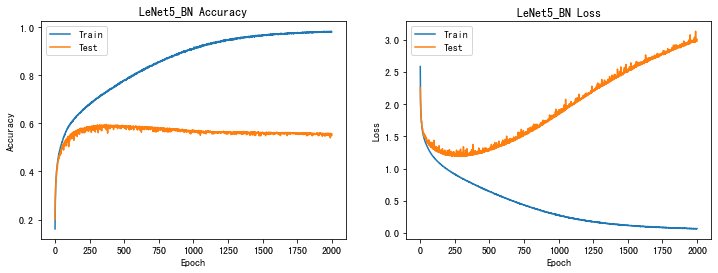

In [228]:
train_virtualize(history, name='LeNet5_BN')

模型过拟合，降低模型复杂度

In [223]:
def img_clf_model():
    """
    LeNet5
    """
    inputs = keras.Input(shape=(32, 32, 3))

    # layer_1 convolution, pooling
    conv_1 = Conv2D(filters=6, kernel_size=(3, 3), activation='relu')(inputs)
    pooling_1 = MaxPooling2D(pool_size=(2, 2))(BatchNormalization()(conv_1))

    # layer_2 convolution, pooling
    conv_2 = Conv2D(filters=5, kernel_size=(3, 3), activation='relu')(pooling_1)
    pooling_2 = MaxPooling2D(pool_size=(2, 2))(BatchNormalization()(conv_2))

    # layer_3 full connection
    flatten = Flatten()(pooling_2)
    dense_3 = Dense(units=32, activation='relu')(flatten)

    # layer_4 full connection
    dense_4 = Dense(units=12, activation='relu')(BatchNormalization()(dense_3))

    # layer_5 output
    outputs = Dense(units=10, activation='softmax')(BatchNormalization()(dense_4))

    return keras.Model(inputs=inputs, outputs=outputs)


In [222]:
img_clf_model = img_clf_model()
img_clf_model.summary()

Model: "model_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_28 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 30, 30, 6)         168       
_________________________________________________________________
batch_normalization_104 (Bat (None, 30, 30, 6)         24        
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 15, 15, 6)         0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 13, 13, 5)         275       
_________________________________________________________________
batch_normalization_105 (Bat (None, 13, 13, 5)         20        
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 6, 6, 5)           0  

**Evaluation**

In [95]:
from tensorflow.keras.models import load_model

In [97]:
model = load_model('lenet5_bn.model')

model.evaluate(x_test, y_test)

10000/10000 [==============================] - 3s 344us/sample - loss: 3.0583 - acc: 0.5491


[3.0582823347091677, 0.5491]

## Optional 

TODO

##### Do you want to build a CNN from scratch ? 

In this optianl part, you will build a cnn network step by step.

In [ ]:
import numpy as np
np.random.seed(1)

##### 4.1 Implement a convolution step

Hints: Numpy.sum function might be useful.

In [ ]:
def conv_single_step(a_prev_slice,W,b):
    '''
    Apply one filter defined by parameters W on a single slice (a_slice_prev) of the output activation 
    of the previous layer.
    Arguments:
    a_prev_slice: slice of input data (shape=(f,f,n_C_prev))
    W: Weight parameters contained in a window. (shape = (f,f,n_C_prev))
    b: Bias parameters contained in a window. (shape=(1,1,1))
    
    Reutrns:
    
    Z: a scalar value, the result of convolving the sliding window (W, b) on a slice x of the input data 
    '''
    # Element-wise product
    s = None
    
    # Sum over s  
    Z = None
    
    # Add bias b to z.
    Z = None
    
    return Z

In [ ]:
np.random.seed(1)
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

Z = conv_single_step(a_slice_prev, W, b)
print("Z =", Z)

Use the code above to test your code. If your c
ode is correct, you should be able to get the output shown as below.

<table>
    <tr>
        <td>
            Z
        </td>
        <td>
            -6.99908945068
        </td>
    </tr>

</table>

##### 4.2 Padding

Hints: Numpy.pad function might be useful.

In [ ]:
def zero_pad(X, pad):
    """
    Pad with zeros all images of the dataset X. The padding is applied to the height and width of an image, 
    as illustrated in Figure 1.
    
    Argument:
    X: python numpy array of shape (m, n_H, n_W, n_C) representing a batch of m images
    pad: integer, amount of padding around each image on vertical and horizontal dimensions
    
    Returns:
    X_pad: padded image of shape (m, n_H + 2*pad, n_W + 2*pad, n_C)
    """

    X_pad = None
    
    return X_pad

In [ ]:
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_pad(x, 2)
print ("x.shape =\n", x.shape)
print ("x_pad.shape =\n", x_pad.shape)
print ("x[1,1] =\n", x[1,1])
print ("x_pad[1,1] =\n", x_pad[1,1])

Use the code above to test your code. If your code is correct, you should be able to get the output shown as below.

```
x.shape =
 (4, 3, 3, 2)
x_pad.shape =
 (4, 7, 7, 2)
x[1,1] =
 [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] =
 [[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]
```

##### 4.3 Implement a forward propagation in CNN.

Hints: The formulas to calculate the output shapes are :

$$ n_H = \lfloor \frac{n_{H_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
$$ n_W = \lfloor \frac{n_{W_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
$$ n_C = \text{number of filters used in the convolution}$$

In [ ]:
def conv_forward(A_prev, W, b, hparameters):
    """
    Implements the forward propagation for a convolution function
    
    Arguments:
    A_prev: output activations of the previous layer, 
        numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    W: Weights, numpy array of shape (f, f, n_C_prev, n_C)
    b: Biases, numpy array of shape (1, 1, 1, n_C)
    hparameters: python dictionary containing "stride" and "pad"
        
    Returns:
    Z: conv output, numpy array of shape (m, n_H, n_W, n_C)
    cache: cache of values needed for the conv_backward() function
    """
    
    # Get dimensions from A_prev's shape  
    (m, n_H_prev, n_W_prev, n_C_prev) = None
    
    # Get dimensions from W's shape 
    (f, f, n_C_prev, n_C) = None
    
    # Get information from "hparameters" 
    stride = None
    pad = None
    
    # Compute the dimensions of the CONV output volume using the formula given above. 
    # Hint: use int() to apply the 'floor' operation. 
    n_H = None
    n_W = None
    
    # Initialize the output volume Z with zeros. 
    Z = None
    
    # Create A_prev_pad by padding A_prev
    A_prev_pad = None
    
    for i in range(None):               # loop over the batch of training examples
        a_prev_pad = None               # Select ith training example's padded activation
        for h in range(None):           # loop over vertical axis of the output volume
            # Find the vertical start and end of the current "slice" 
            vert_start = None
            vert_end = None
            
            for w in range(None):       # loop over horizontal axis of the output volume
                # Find the horizontal start and end of the current "slice"
                horiz_start = None
                horiz_end = None
                
                for c in range(None):   # loop over channels (= #filters) of the output volume
                                        
                    # Use the corners to define the (3D) slice of a_prev_pad (See Hint above the cell). 
                    a_slice_prev = None
                    
                    # Convolve the (3D) slice with the correct filter W and bias b, to get back one output neuron. 
                    weights = None
                    biases = None
                    Z[i, h, w, c] = None
                                        
    
    # Making sure your output shape is correct
    assert(Z.shape == (m, n_H, n_W, n_C))
    
    # Save information in "cache" for the backprop
    cache = (A_prev, W, b, hparameters)
    
    return Z, cache

In [ ]:
np.random.seed(1)
A_prev = np.random.randn(10,5,7,4)
W = np.random.randn(3,3,4,8)
b = np.random.randn(1,1,1,8)
hparameters = {"pad" : 1,
               "stride": 2}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
print("Z's mean =\n", np.mean(Z))
print("Z[3,2,1] =\n", Z[3,2,1])
print("cache_conv[0][1][2][3] =\n", cache_conv[0][1][2][3])

Use the code above to test your code. If your code is correct, you should be able to get the output shown as below.

```
Z's mean =
 0.692360880758
Z[3,2,1] =
 [ -1.28912231   2.27650251   6.61941931   0.95527176   8.25132576
   2.31329639  13.00689405   2.34576051]
cache_conv[0][1][2][3] = [-1.1191154   1.9560789  -0.3264995  -1.34267579]
```

##### 4.4 Pooling layers

Hints: As there\'s no padding, the formulas binding the output shape of the pooling to the input shape is:

$$ n_H = \lfloor \frac{n_{H_{prev}} - f}{stride} \rfloor +1 $$

$$ n_W = \lfloor \frac{n_{W_{prev}} - f}{stride} \rfloor +1 $$

$$ n_C = n_{C_{prev}}$$

In [ ]:
def pool_forward(A_prev, hparameters, mode = "max"):
    """
    Implements the forward pass of the pooling layer
    
    Arguments:
    A_prev: Input data, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    hparameters: python dictionary containing "f" and "stride"
    mode: the pooling mode you would like to use, defined as a string ("max" or "average")
    
    Returns:
    A: output of the pool layer, a numpy array of shape (m, n_H, n_W, n_C)
    cache: cache used in the backward pass of the pooling layer, contains the input and hparameters 
    """
    
    # Get dimensions from the input shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Get hyperparameters from "hparameters"
    f = hparameters["f"]
    stride = hparameters["stride"]
    
    # Define the dimensions of the output
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev
    
    # Initialize output matrix A
    A = np.zeros((m, n_H, n_W, n_C))              
    
    for i in range(None):                         # loop over the training examples
        for h in range(None):                     # loop on the vertical axis of the output volume
            # Find the vertical start and end of the current "slice" (≈2 lines)
            vert_start = None
            vert_end = None
            
            for w in range(None):                 # loop on the horizontal axis of the output volume
                # Find the vertical start and end of the current "slice" (≈2 lines)
                horiz_start = None
                horiz_end = None
                
                for c in range (None):            # loop over the channels of the output volume
                    
                    # Use the corners to define the current slice on the ith training example of A_prev, channel c. (≈1 line)
                    a_prev_slice = None
                    
                    # Compute the pooling operation on the slice. 
                    # Use an if statement to differentiate the modes. 
                    # Use np.max and np.mean.
                    if mode == "max":
                        A[i, h, w, c] = None
                    elif mode == "average":
                        A[i, h, w, c] = None
    
    # Store the input and hparameters in "cache" for pool_backward()
    cache = (A_prev, hparameters)
    
    # Making sure your output shape is correct
    assert(A.shape == (m, n_H, n_W, n_C))
    
    return A, cache

In [ ]:
np.random.seed(1)
A_prev = np.random.randn(2, 5, 5, 3)
hparameters = {"stride" : 1, "f": 3}

A, cache = pool_forward(A_prev, hparameters)
print("mode = max")
print("A.shape = " + str(A.shape))
print("A =\n", A)
print()
A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A =\n", A)

Use the code above to test your code. If your code is correct, you should be able to get the output shown as below.

```
mode = max
A.shape = (2, 3, 3, 3)
A =
 [[[[ 1.74481176  0.90159072  1.65980218]
   [ 1.74481176  1.46210794  1.65980218]
   [ 1.74481176  1.6924546   1.65980218]]

  [[ 1.14472371  0.90159072  2.10025514]
   [ 1.14472371  0.90159072  1.65980218]
   [ 1.14472371  1.6924546   1.65980218]]

  [[ 1.13162939  1.51981682  2.18557541]
   [ 1.13162939  1.51981682  2.18557541]
   [ 1.13162939  1.6924546   2.18557541]]]


 [[[ 1.19891788  0.84616065  0.82797464]
   [ 0.69803203  0.84616065  1.2245077 ]
   [ 0.69803203  1.12141771  1.2245077 ]]

  [[ 1.96710175  0.84616065  1.27375593]
   [ 1.96710175  0.84616065  1.23616403]
   [ 1.62765075  1.12141771  1.2245077 ]]

  [[ 1.96710175  0.86888616  1.27375593]
   [ 1.96710175  0.86888616  1.23616403]
   [ 1.62765075  1.12141771  0.79280687]]]]

mode = average
A.shape = (2, 3, 3, 3)
A =
 [[[[ -3.01046719e-02  -3.24021315e-03  -3.36298859e-01]
   [  1.43310483e-01   1.93146751e-01  -4.44905196e-01]
   [  1.28934436e-01   2.22428468e-01   1.25067597e-01]]

  [[ -3.81801899e-01   1.59993515e-02   1.70562706e-01]
   [  4.73707165e-02   2.59244658e-02   9.20338402e-02]
   [  3.97048605e-02   1.57189094e-01   3.45302489e-01]]

  [[ -3.82680519e-01   2.32579951e-01   6.25997903e-01]
   [ -2.47157416e-01  -3.48524998e-04   3.50539717e-01]
   [ -9.52551510e-02   2.68511000e-01   4.66056368e-01]]]


 [[[ -1.73134159e-01   3.23771981e-01  -3.43175716e-01]
   [  3.80634669e-02   7.26706274e-02  -2.30268958e-01]
   [  2.03009393e-02   1.41414785e-01  -1.23158476e-02]]

  [[  4.44976963e-01  -2.61694592e-03  -3.10403073e-01]
   [  5.08114737e-01  -2.34937338e-01  -2.39611830e-01]
   [  1.18726772e-01   1.72552294e-01  -2.21121966e-01]]

  [[  4.29449255e-01   8.44699612e-02  -2.72909051e-01]
   [  6.76351685e-01  -1.20138225e-01  -2.44076712e-01]
   [  1.50774518e-01   2.89111751e-01   1.23238536e-03]]]]
```

####  Congratulations! You hanve finished the assignment 6.  You now understand how convolutional neural networks work.